<a href="https://colab.research.google.com/github/JoaoAlexandreFerreira/RNA/blob/main/Rede_neural_su_et_al2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [108]:
# Carregando o dataset
import numpy as np
import keras
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.initializers import Ones, Zeros, RandomUniform, RandomNormal, glorot_uniform
from keras.metrics import MeanAbsolutePercentageError, MeanAbsoluteError, MeanRelativeError

df = pd.read_csv('data_cov (1).csv')

#Separando em entrada e saída
y = df['cov']
x = df.drop('cov', axis = 1)
flow = df['flow_distance_ratio']

Será realizada uma comparação com os dados em ordem crescente e com os dados sorteados aleatoriamente, respectivamente.

In [109]:
#Separando dados para treino e para teste da rede neural, primeiramente de modo ordenado

x_treino = x[0:85:] ; x_teste = x[85:]
y_treino = y[0:85] ; y_teste = y[85:]
print(x_treino)
#Normalizando os dados de entrada
scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

def erro_relativo(y_pred, y_true):
  return np.mean(np.abs((y_true - y_pred) / y_true))

    hbr  velocity  temperatura  diamenter_ratio  flow_distance_ratio
0   0.1         1          300              0.2                    2
1   0.1         1          300              0.2                    3
2   0.1         1          300              0.2                    4
3   0.1         1          300              0.2                    5
4   0.1         1          300              0.2                    6
..  ...       ...          ...              ...                  ...
80  0.1         1          300              0.2                   84
81  0.1         1          300              0.2                   85
82  0.1         1          300              0.2                   86
83  0.1         1          300              0.2                   87
84  0.1         1          300              0.2                   88

[85 rows x 5 columns]


In [110]:
#Para criar o modelo da rede precisamos usar o Sequential, do keras.models

modelo = Sequential()
modelo.add(tf.keras.layers.Input(shape=(x_treino_normalizado.shape[1],)))
#No paper de su é informado que ele inicia pelo número de camadas ocultas, com 10 neuronios/nos
#Começando uma análise com duas camadas ocultas

for i in range(11):
  modelo.add(Dense(units=40, activation='relu'))

#camaada de saída

modelo.add(Dense(units=1,activation = 'linear'))
modelo.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

resultado = modelo.fit(x_treino, y_treino, epochs = 350, batch_size = 10, validation_data=(x_teste, y_teste))


Epoch 1/350
9/9 [==============================] - 2s 30ms/step - loss: 0.0470 - mae: 0.1842 - val_loss: 0.0040 - val_mae: 0.0588
Epoch 2/350
9/9 [==============================] - 0s 7ms/step - loss: 0.0074 - mae: 0.0498 - val_loss: 0.0029 - val_mae: 0.0486
Epoch 3/350
9/9 [==============================] - 0s 9ms/step - loss: 0.0043 - mae: 0.0315 - val_loss: 0.0013 - val_mae: 0.0292
Epoch 4/350
9/9 [==============================] - 0s 9ms/step - loss: 0.0063 - mae: 0.0467 - val_loss: 0.0017 - val_mae: 0.0331
Epoch 5/350
9/9 [==============================] - 0s 7ms/step - loss: 0.0048 - mae: 0.0280 - val_loss: 0.0019 - val_mae: 0.0370
Epoch 6/350
9/9 [==============================] - 0s 8ms/step - loss: 0.0041 - mae: 0.0235 - val_loss: 0.0035 - val_mae: 0.0535
Epoch 7/350
9/9 [==============================] - 0s 7ms/step - loss: 0.0044 - mae: 0.0339 - val_loss: 0.0060 - val_mae: 0.0734
Epoch 8/350
9/9 [==============================] - 0s 6ms/step - loss: 0.0050 - mae: 0.0417 - va

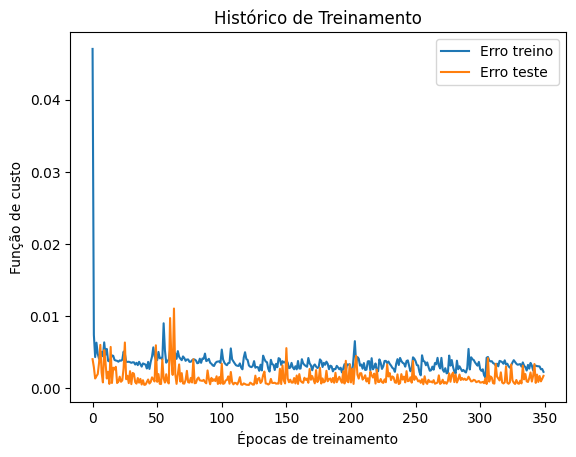

In [111]:
# Plotando gráfico do histórico de treinamento

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [112]:
y_pred = modelo.predict(x_treino)
y_pred = pd.DataFrame(y_pred)

3/3 [==============================] - 0s 6ms/step


In [113]:
y_treino = y_treino.values
y_pred = y_pred.values
erro_relativo(y_pred, y_treino)

2.6566380809448873

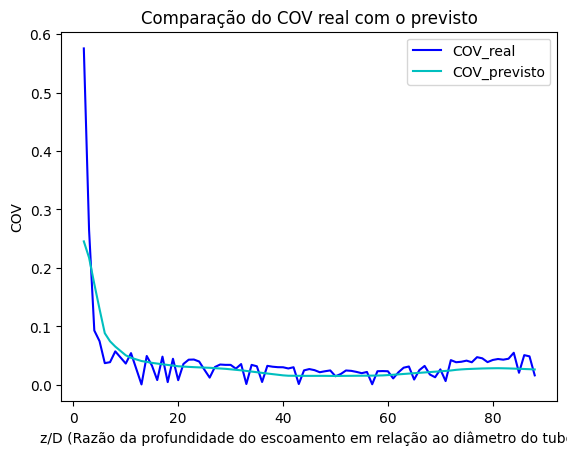

In [114]:
plt.plot(x_treino['flow_distance_ratio'], y_treino, c='b')
plt.plot(x_treino['flow_distance_ratio'], y_pred, c='c')
plt.title('Comparação do COV real com o previsto')
plt.ylabel('COV')
plt.xlabel('z/D (Razão da profundidade do escoamento em relação ao diâmetro do tubo)')
plt.legend(['COV_real', 'COV_previsto'])
plt.show()

Agora, a análise com dados aleatórios

In [115]:
x_treino, x_teste, y_treino, y_teste, = train_test_split(x , y, test_size = 10, random_state = None)

In [116]:
#Convertendo para array
x_treino = x_treino.values
x_teste = x_teste.values
y_treino = y_treino.values
y_teste = y_teste.values
#normalizando
scaler = MinMaxScaler()
x_treino_normalizado = scaler.fit_transform(x_treino)
x_teste_normalizado = scaler.transform(x_teste)

In [117]:
y_treino = np.reshape(y_treino, (86,1))
y_treino

array([[1.859216e-02],
       [2.462122e-02],
       [3.224660e-02],
       [1.168941e-01],
       [8.921335e-03],
       [3.849311e-02],
       [4.127466e-02],
       [6.665483e-02],
       [2.125699e-02],
       [2.755558e-02],
       [9.277751e-02],
       [2.142428e-02],
       [4.742218e-03],
       [3.162396e-02],
       [2.499870e-02],
       [2.787455e-02],
       [5.753539e-04],
       [2.200700e-02],
       [6.423130e-02],
       [2.505141e-02],
       [2.051108e-02],
       [2.442745e-02],
       [4.810011e-02],
       [4.720306e-02],
       [1.268802e-03],
       [2.997259e-02],
       [2.887965e-02],
       [5.028385e-02],
       [5.754142e-01],
       [2.379054e-02],
       [5.411254e-02],
       [4.769653e-02],
       [4.862262e-02],
       [8.030593e-03],
       [5.456175e-02],
       [2.450035e-02],
       [2.310865e-02],
       [3.402235e-02],
       [4.446323e-02],
       [4.453310e-02],
       [3.007064e-02],
       [6.627263e-02],
       [3.235030e-02],
       [3.8

In [118]:
#Criando um segundo modelo de rede neural

modelo2 = Sequential()
modelo2.add(tf.keras.layers.Input(shape=(x_treino_normalizado.shape[1],)))
#No paper de su é informado que ele inicia pelo número de camadas ocultas, com 10 neuronios/nos
#Começando uma análise com duas camadas ocultas

for i in range(11):
  modelo2.add(Dense(units=40, activation='relu'))

#camaada de saída

modelo2.add(Dense(units=1,activation = 'linear'))
modelo2.compile(loss='mse', optimizer = 'adam', metrics=['mae'])

resultado = modelo2.fit(x_treino, y_treino, epochs = 350, batch_size = 5, validation_data=(x_teste, y_teste))

Epoch 1/350
18/18 [==============================] - 2s 17ms/step - loss: 0.0106 - mae: 0.0529 - val_loss: 0.0011 - val_mae: 0.0309
Epoch 2/350
18/18 [==============================] - 0s 5ms/step - loss: 0.0047 - mae: 0.0364 - val_loss: 0.0017 - val_mae: 0.0392
Epoch 3/350
18/18 [==============================] - 0s 5ms/step - loss: 0.0042 - mae: 0.0349 - val_loss: 0.0017 - val_mae: 0.0355
Epoch 4/350
18/18 [==============================] - 0s 4ms/step - loss: 0.0042 - mae: 0.0303 - val_loss: 8.4012e-04 - val_mae: 0.0241
Epoch 5/350
18/18 [==============================] - 0s 5ms/step - loss: 0.0043 - mae: 0.0349 - val_loss: 3.0957e-04 - val_mae: 0.0130
Epoch 6/350
18/18 [==============================] - 0s 6ms/step - loss: 0.0047 - mae: 0.0370 - val_loss: 3.1241e-04 - val_mae: 0.0116
Epoch 7/350
18/18 [==============================] - 0s 4ms/step - loss: 0.0043 - mae: 0.0354 - val_loss: 2.8165e-04 - val_mae: 0.0154
Epoch 8/350
18/18 [==============================] - 0s 6ms/step -

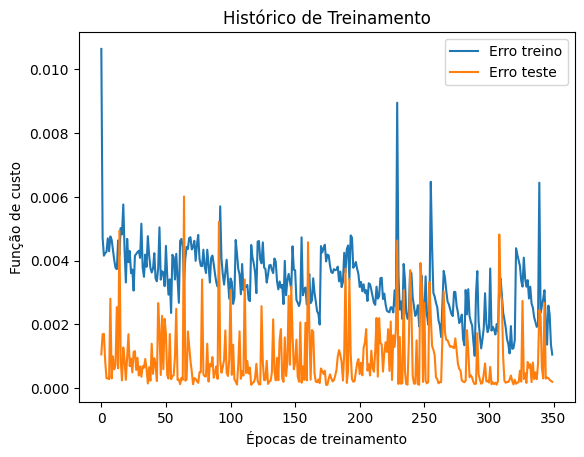

In [119]:
# Plotando gráfico do histórico de treinamento

plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Erro teste'])
plt.show()

In [120]:
x_treino = pd.DataFrame(x_treino)
x_treino.insert(5, 'Cov',y_treino)
x_treino = x_treino.sort_values(by=4)

In [121]:
y_treino = x_treino['Cov']
x_treino = x_treino.drop('Cov', axis = 1)
y_pred = modelo.predict(x_treino)

3/3 [==============================] - 0s 4ms/step


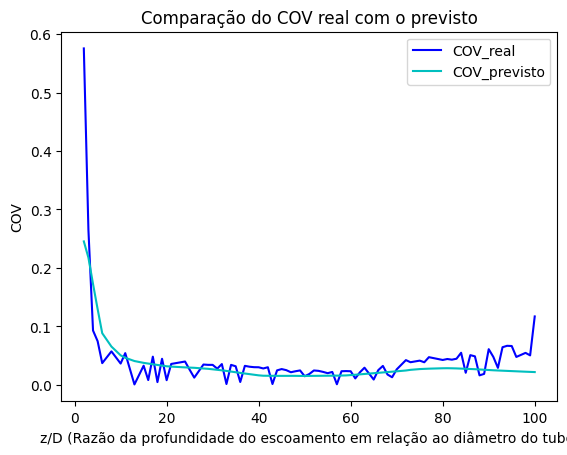

In [122]:
plt.plot(x_treino[4], y_treino, c='b')
plt.plot(x_treino[4], y_pred, c='c')
plt.title('Comparação do COV real com o previsto')
plt.ylabel('COV')
plt.xlabel('z/D (Razão da profundidade do escoamento em relação ao diâmetro do tubo)')
plt.legend(['COV_real', 'COV_previsto'])
plt.show()

In [123]:
y_treino = y_treino.values
y_treino = np.reshape(y_treino, (86,1))
y_pred = np.reshape(y_pred, (86, 1))

In [124]:
erro_relativo(y_pred,y_treino)

1.9037009481074714